In [30]:
import pandas as pd
import numpy as np
%matplotlib inline

In [31]:
#establish monthly retention rates for new users of hypothetical apps
ret_app1 = [1,.05,.02, 0, 0, 0, 0,  0, 0,0]

ret_app2 = [1, .7,.4,.2,.1, .03,.02, .01, .01, .01]

ret_app3 = [1,.3, .25, .2,.2,.2, .2,.2, .2, .2]

ret_app4 = [1, .8,.75, .72, .7,.7, .7, .7, .7,.7]



In [36]:
#forecast MAU assuming a constant monthly inflow of new unique users
def forecast_mau(ret_dict, monthly_users):
    n_months = len(ret_dict)
    
    mau = np.repeat(0, n_months, axis = 0)
    shift = 0
    
    for m in range(n_months):
        ret_list = []
        
        for i in range(n_months - m):
            ret_list.append(monthly_users * ret_dict[i])
            
        for e in range(len(ret_list)):
            mau[shift + e] += ret_list[e]
            
        shift += 1
    
    return mau

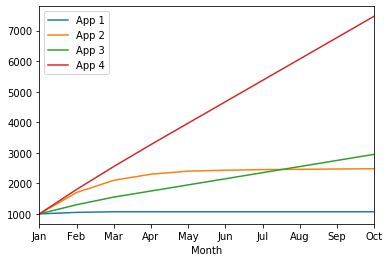

In [37]:
df_mau = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
    'App 1': forecast_mau(ret_app1, 1000),
    'App 2': forecast_mau(ret_app2, 1000),
    'App 3': forecast_mau(ret_app3, 1000),
    'App 4': forecast_mau(ret_app4, 1000)
})

df_mau.plot(x = 'Month', y = ['App 1', 'App 2', 'App 3', 'App 4'])

In [38]:
df_mau

,Month,App 1,App 2,App 3,App 4
0,Jan,1000,1000,1000,1000
1,Feb,1050,1700,1300,1800
2,Mar,1070,2100,1550,2550
3,Apr,1070,2300,1750,3270
4,May,1070,2400,1950,3970
5,Jun,1070,2430,2150,4670
6,Jul,1070,2450,2350,5370
7,Aug,1070,2460,2550,6070
8,Sep,1070,2470,2750,6770
9,Oct,1070,2480,2950,7470
